In [6]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

# 保证图片在浏览器内正常显示
%matplotlib inline

In [30]:
df1 = pd.DataFrame()

In [7]:
def daily_data_faker(seedx,r0,r1):   #生产随机上下浮动数据
    daily_up_down = []
    random.seed(seedx)
    for i in range(6000):    #8年
        daily_up_down.append(random.uniform(r0, r1))
    return daily_up_down

In [8]:
def weekly_add1():     #假设只有5天
    add1 = []
    n = 0
    for i in range(6000):    #8年
        if n == 3:          #定投周4
            add1.append(100)
        elif n == 4:
            n = -1
            add1.append(0)
        else:
            add1.append(0)
        n += 1
    return add1

In [9]:
def weekly_add_rand():     #假设只有5天
    add_rand = []
    days = [0,1,2,3,4]
    n = 0
    ch_day = random.choice(days)
    for i in range(6000):    #8年
        if n == ch_day:
            add_rand.append(100)
        else:
            add_rand.append(0)
        if n == 4:
            n =-1
            ch_day = random.choice(days)
        n += 1
    return add_rand

In [10]:
def weekly_add_min(seedx,r0,r1):     #假设只有5天
    add_min = []
    days = daily_data_faker(seedx,r0,r1)
    buffer1 = []         
    buffer2 = []
    n = 0
    for i in days:    #8年
        if n < 5:
            buffer1.append(i)      #升降元素
            if len(buffer1) == 5:
                for j in buffer1:
                    if j == min(buffer1):
                        buffer2.append(100)
                    else:
                        buffer2.append(0)
            if n == 4:
                add_min = add_min + buffer2
                buffer1 = []
                buffer2 = []
                n = -1
        n += 1
            
    return add_min

In [6]:
len(weekly_add_min(12,-0.02,0.0203))

6000

In [29]:
df1 = pd.DataFrame()
df1['updown'] = daily_data_faker(62,-0.05,0.05)
df1['固定周四'] = weekly_add1()
df1['随机'] = weekly_add_rand()
df1['上帝视角'] = weekly_add_min(62,-0.05,0.05)
df1.to_excel('demo0.xlsx')

In [16]:
a = [43,52,4,6,4]
a.index(max([43,52,4,6,4]))

1

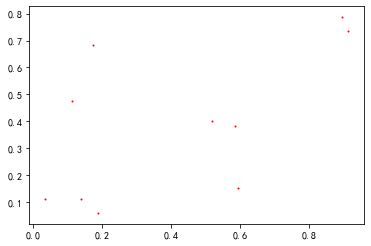

In [72]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
# 保证图片在浏览器内正常显示
%matplotlib inline

# 10个点
N = 10
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c ='r',s=1)
plt.show()

In [74]:
4000 **0.5

63.245553203367585

In [5]:
def data_faker_plt(seedx,r0,r1):               #画图单位净值
    daily_up_down = []
    random.seed(seedx)
    x = [x for x in range(6000)]
    y = [1]
    for i in range(5999):    #8年
#         daily_up_down.append(random.uniform(r0, r1))
        y.append(y[-1] * (random.uniform(r0, r1) + 1))
    return (x,y)

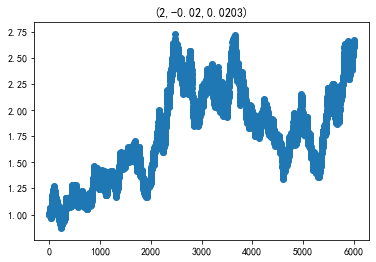

In [41]:
x = yyy[0]
y = yyy[1]
plt.title('(2,-0.02,0.0203)')
plt.scatter(x, y)
plt.savefig(r"D:\sgmuserprofile\s6ry2k\20210126data_faker\b0.02\demo2.jpg",dpi = 400)
plt.show()

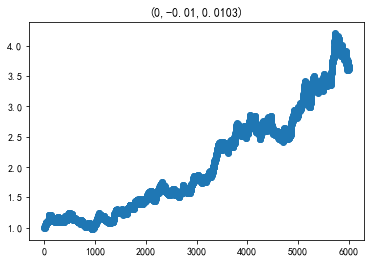

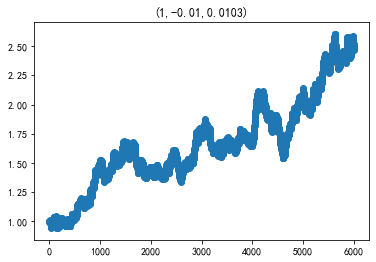

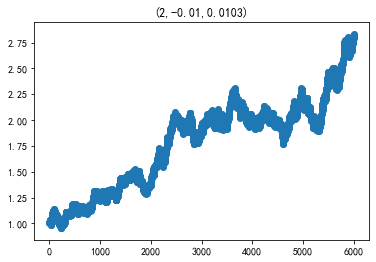

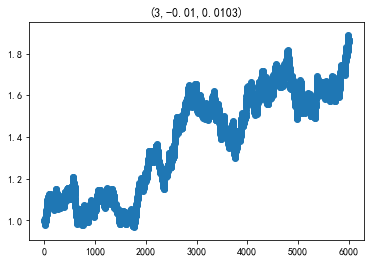

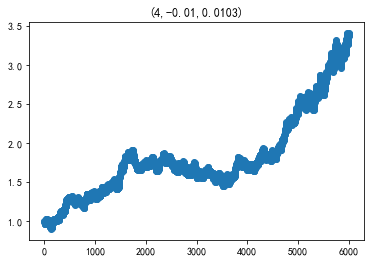

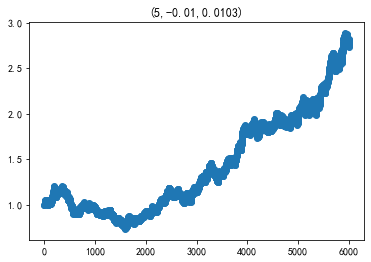

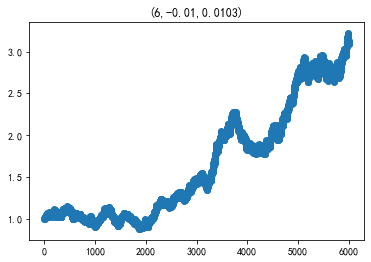

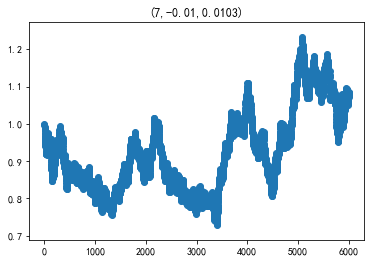

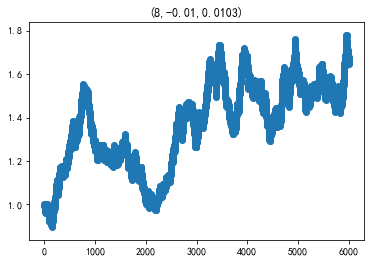

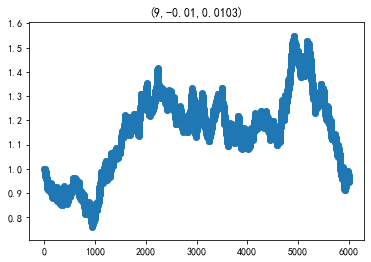

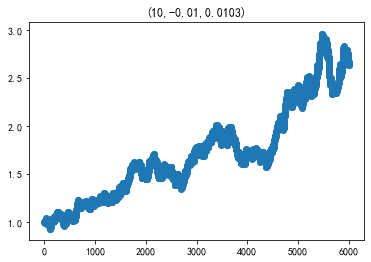

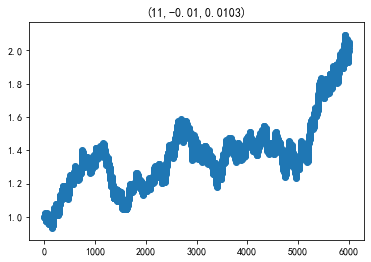

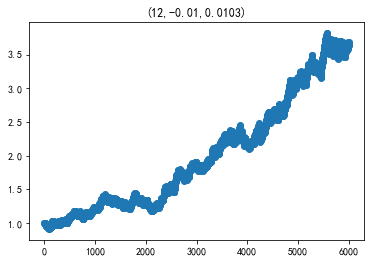

In [ ]:
#统计2、4倍数量
data2 = []
data4 = []
path_file = r'D:\sgmuserprofile\s6ry2k\20210126data_faker\test0'  #修改数据3
for z in range(100):
    test_tuple = data_faker_plt(z,-0.01,0.0103)                     #修改数据1
    x = test_tuple[0]
    y = test_tuple[1]
    seed_title = '(' + str(z) + ',-0.01,0.0103)'                    #修改数据2
    plt.title(seed_title)
    plt.scatter(x, y)
    plt.savefig(path_file + '\\' + str(z) ,dpi = 400)    
    plt.show()
    
    n2 = sum(i >= 2 for i in y)              #统计大于单位净值2倍的天数
    n4 = sum(i >= 4 for i in y)              #统计大于单位净值4倍的天数
    data2.append(n2)
    data4.append(n4)
    
plt.title(seed_title)
# plt.scatter(data2, data4, c='r', s = int(x ** 0.4) + 1,alpha=0.5)
plt.scatter(data2, data4, c='r', s = 10, alpha=0.5)
plt.savefig(path_file + '\\' + '2倍4倍统计' ,dpi = 400)    
plt.show()
df9 = pd.DataFrame()
df9['2倍计数'] = data2
df9['4倍计数'] = data4
df9.to_excel(path_file + '\\' + '2倍4倍统计.xlsx')

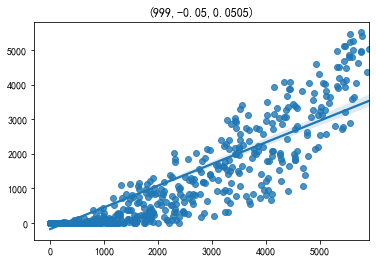

In [28]:
#统计2、4倍数量，一千点线性回归，成功因子分析
data2 = []
data4 = []
path_file = r'D:\sgmuserprofile\s6ry2k\20210126data_faker\test0'  #修改数据3
for z in range(1000):
    test_tuple = data_faker_plt(z,-0.05,0.0505)                     #修改数据1
    x = test_tuple[0]
    y = test_tuple[1]
    seed_title = '(' + str(z) + ',-0.05,0.0505)'                    #修改数据2
#     plt.title(seed_title)
#     plt.scatter(x, y)
#     plt.savefig(path_file + '\\' + str(z) ,dpi = 400)    
#     plt.show()
    
    n2 = sum(i >= 2 for i in y)
    n4 = sum(i >= 4 for i in y)
    data2.append(n2)
    data4.append(n4)

plt.title(seed_title)
sns.regplot(x=data2, y=data4)
plt.savefig(path_file + '\\' + '2倍4倍统计' ,dpi = 400)    
plt.show()
df9 = pd.DataFrame()
df9['2倍计数'] = data2
df9['4倍计数'] = data4
df9.to_excel(path_file + '\\' + '2倍4倍统计.xlsx')